# Kadamati Rupa Phani Sree Sowmya

## Task 1: Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours

In [48]:
#Import Packages
import pandas as pd
import numpy as np  
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [49]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [50]:
#Size of train data
df.shape

(25, 2)

In [51]:
# Lets see the statistical details of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64
Skewness: 0.233965
Kurtosis: -1.443833


C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


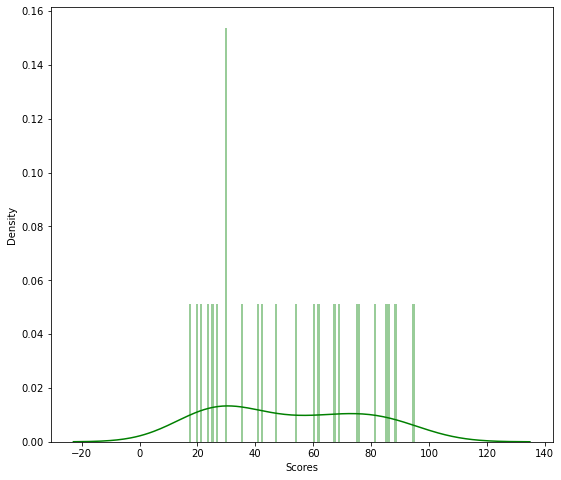

In [52]:
# Distribution of target variable
print(df['Scores'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Scores'], color='g', bins=100, hist_kws={'alpha': 0.4});
print("Skewness: %f" % df['Scores'].skew())
print("Kurtosis: %f" % df['Scores'].kurt())

We can see that the target variable 'Scores' is normally distributed

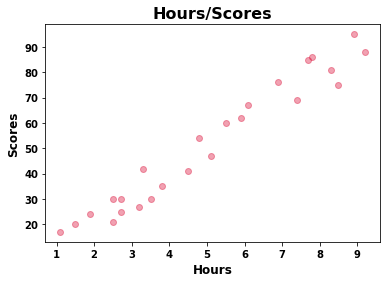

In [11]:
#Pattern of correlation of hours and scores
plt.scatter(x=df['Hours'], y=df['Scores'], color='crimson', alpha=0.4)
plt.title('Hours/Scores', weight='bold', fontsize=16)
plt.xlabel('Hours', weight='bold', fontsize=12)
plt.ylabel('Scores', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

From the graph we can see that 'Hours' and 'Scores' are linearly correlated

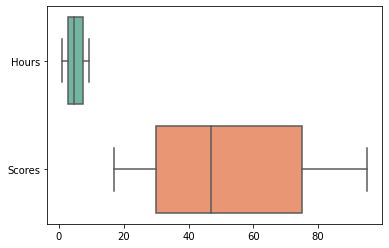

In [12]:
# check if there are any outliers present in the data
ax = sns.boxplot(data=df, orient="h", palette="Set2")

We can see that there are no outliers present in the data

### Preparing the data

In [13]:
x=df.drop(['Scores'],axis=1)
y=df['Scores']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

### Model Building

In [31]:
lm=LinearRegression()

In [32]:
lm.fit(x_train,y_train)

LinearRegression()

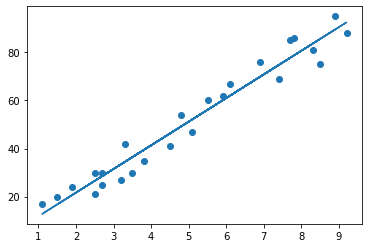

In [33]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [34]:
y_pred = lm.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [36]:
rms

4.543287018366107

In [37]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
r2

0.9050356232459791

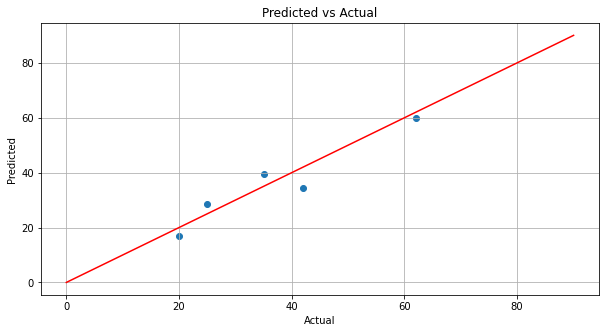

In [38]:
plt.figure(figsize=[10,5])
plt.scatter(y_test, y_pred)
plt.plot([0,90],[0,90],color='red')
plt.grid(True)
plt.title('Predicted vs Actual')
plt.ylabel('Predicted')
plt.xlabel('Actual');

In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


In [45]:
lm.predict([[9.25]])

array([92.96728365])